In [1]:
import pyMSB as ms
import matplotlib.pyplot as plt
import numpy as np

### Data load

In [ ]:
# TODO
ms.read_data()

### Spectrum genaration

In [2]:
# Define spectroscope parameters
CHANNELS = np.arange(0, 1024, dtype=int)
GEOMETRY = ms.models.SpectroscopeGeometry.TRANSMISSION
spectroscope_true = ms.models.SpectroscopeComputable(scale=40, isomer_shift_ref=512)

In [3]:
# Define subspectra
singlet_true = ms.models.SingletComputable(amplitude=1e4,
                                           isomer_shift=0,
                                           line_width1=8)
doublet_true = ms.models.DoubletComputable(amplitude=1e4,
                                            isomer_shift=0,
                                            quadrupole_split=20,
                                            line_width1=8,
                                            line_width2=8)
sextet_true = ms.models.SextetComputable(amplitude=1e4,
                                         isomer_shift=0,
                                         quadrupole_split=20,
                                         ratio13=3,
                                         ratio23=2,
                                         magnetic_field=30,
                                         line_width1=8,
                                         line_width2=8,
                                         line_width3=8,
                                         line_width4=8,
                                         line_width5=8,
                                         line_width6=8,
                                         line_width7=8,
                                         line_width8=8)

# Define spectrum
spectrum_true = ms.models.SpectrumComputable(background=1e5,
                                             singlets=[singlet_true],
                                            #  doublets=[doublet_true],
                                             sextets=[sextet_true]
                                             )

In [4]:
# Compute true spectrum values
spectrum_true_values = ms.spectrum_func(CHANNELS, spectrum_true, spectroscope_true, GEOMETRY)

# Sample spectrum counts
sprectrum_sample = ms.generate_spectrum(CHANNELS, spectrum_true, spectroscope_true, GEOMETRY)

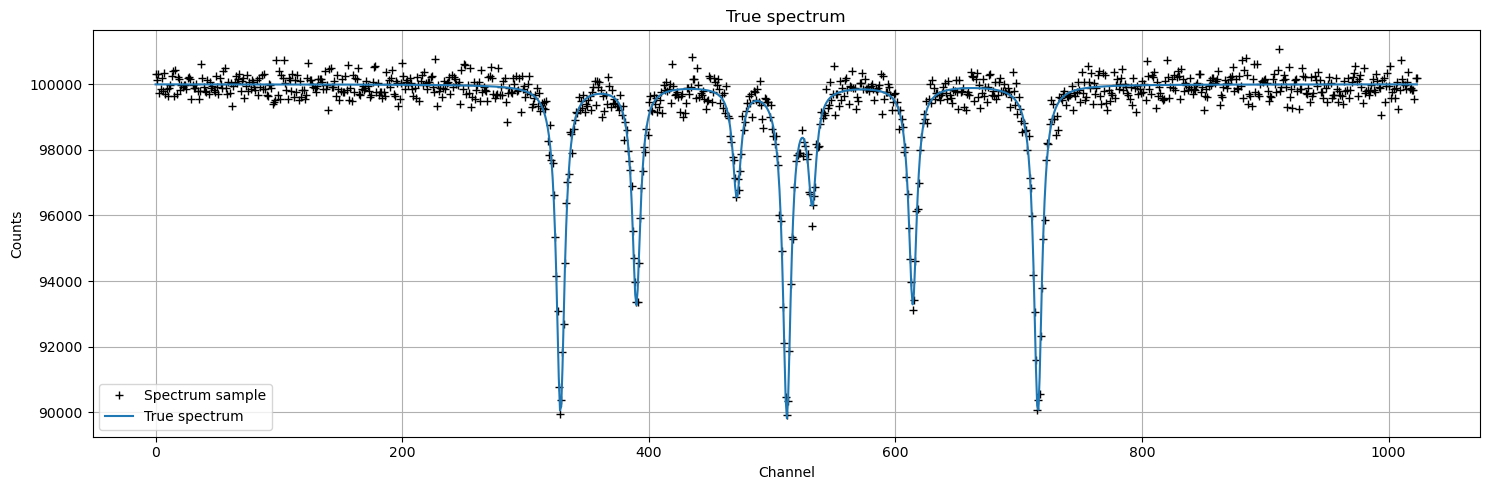

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(CHANNELS, sprectrum_sample, 'k+', label='Spectrum sample')
ax.plot(CHANNELS, spectrum_true_values, label='True spectrum')
ax.legend()
ax.grid()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('True spectrum')
plt.tight_layout()

### Fitting model definition

In [6]:
# Define subspectra specs (user estimate)

singlet_specs = ms.models.SingletSpecs(amplitude=ms.models.SpecsVar(value=1e4 + 850),
                                       isomer_shift=ms.models.SpecsVar(value=0 - 0.8),
                                       line_width1=ms.models.SpecsVar(value=8 + 1))
sextet_specs = ms.models.SextetSpecs(amplitude=ms.models.SpecsVar(value=1e4 - 850),
                                    isomer_shift=ms.models.SpecsVar(value=0 + 0.8),
                                    quadrupole_split=ms.models.SpecsVar(value=20 + 0.8),
                                    ratio13=ms.models.SpecsVar(value=3 + 0.1),
                                    ratio23=ms.models.SpecsVar(value=2 - 0.1),
                                    magnetic_field=ms.models.SpecsVar(value=30 + 1),
                                    line_width1=ms.models.SpecsVar(value=8),
                                    line_width2=ms.models.SpecsVar(value=8),
                                    line_width3=ms.models.SpecsVar(value=8),
                                    line_width4=ms.models.SpecsVar(value=8),
                                    line_width5=ms.models.SpecsVar(value=8),
                                    line_width6=ms.models.SpecsVar(value=8),
                                    line_width7=ms.models.SpecsVar(value=8),
                                    line_width8=ms.models.SpecsVar(value=8),
                                    line_width_coupling=ms.models.LineWidthCoupling.COUPLED
                                    )


# Define spectrum specs (user estimate)

spectrum_specs = ms.models.SpectrumSpecs(background=ms.models.SpecsVar(value=1e5 + 110),
                                         singlets=[singlet_specs],
                                         sextets=[sextet_specs])

# Define analysis specs (user estimate)
analysis_specs = ms.models.AnalysisSpecs(spectrum=spectrum_specs, scope=spectroscope_true)

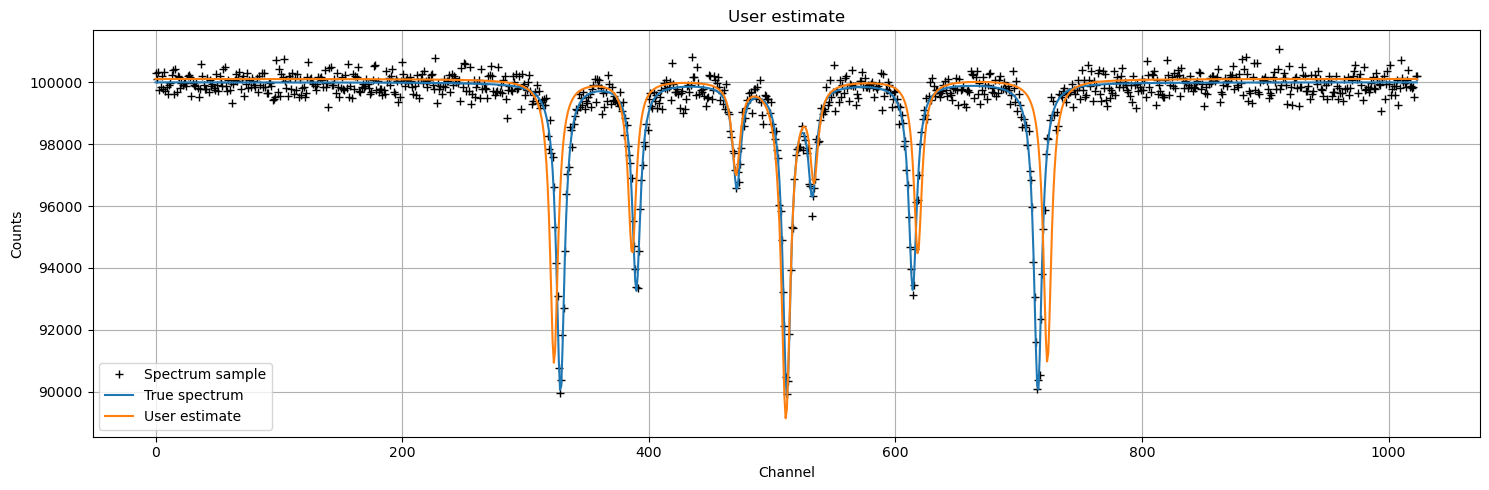

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(CHANNELS, sprectrum_sample, 'k+', label='Spectrum sample')
ax.plot(CHANNELS, spectrum_true_values, label='True spectrum')
ax.plot(CHANNELS, ms.spectrum_func(CHANNELS, spectrum_specs.map(lambda x: x.value), spectroscope_true, GEOMETRY), label='User estimate')
ax.legend()
ax.grid()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('User estimate')
plt.tight_layout()

### LSQ Fit

In [51]:
# Analyze physics
ms.LSQModel.analyze_physics(analysis_specs)

[]

In [52]:
# Define analysis model
lsq_model = ms.LSQModel(analysis_specs, GEOMETRY)

In [ ]:
# Fit LSQ model to sample spectrum
lsq_model = lsq_model.fit(CHANNELS, sprectrum_sample)

In [55]:
# Display results
lsq_model.results

AnalysisPoint(spectrum=SpectrumPoint(background=PointVar(value=100015.65132289981, sigma=11.203617490047852), singlets=[SingletPoint(name=None, amplitude=PointVar(value=10088.89128818904, sigma=174.87681269282194), isomer_shift=PointVar(value=0.05242167506103386, sigma=0.0683364617846912), line_width1=PointVar(value=7.895715498361348, sigma=0.19909842020403584))], doublets=[], sextets=[SextetPoint(name=None, amplitude=PointVar(value=10030.629693310757, sigma=111.57317691752124), isomer_shift=PointVar(value=-0.06267715362201934, sigma=0.04023344400294556), quadrupole_split=PointVar(value=20.026673962209518, sigma=0.08043338819605826), ratio13=PointVar(value=2.892118214002882, sigma=0.07898884566114993), ratio23=PointVar(value=1.9488964513340066, sigma=0.05637818684807944), magnetic_field=PointVar(value=30.00034964693839, sigma=0.007000373486393944), line_width1=PointVar(value=7.895214220685091, sigma=0.11431963341593115), line_width2=PointVar(value=7.895214220685091, sigma=0.11431963341

In [65]:
# Brows results
lsq_model.results.spectrum.singlets[0].amplitude

PointVar(value=10088.89128818904, sigma=174.87681269282194)

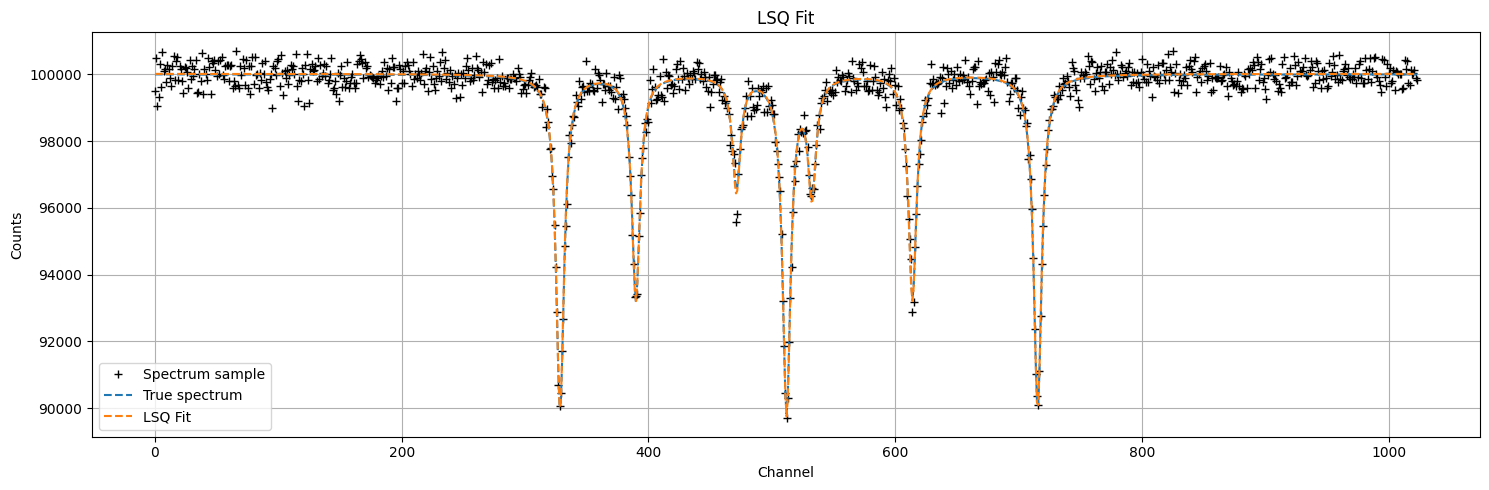

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(CHANNELS, sprectrum_sample, 'k+', label='Spectrum sample')
ax.plot(CHANNELS, spectrum_true_values, '--', label='True spectrum')
ax.plot(CHANNELS, lsq_model.predict(CHANNELS), '--', label='LSQ Fit')
ax.legend()
ax.grid()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('LSQ Fit')
plt.tight_layout()

### MAP Fit

In [12]:
# Analyze physics
ms.MAPModel.analyze_physics(analysis_specs)

[]

In [13]:
# Define analysis model
map_model = ms.MAPModel(analysis_specs, GEOMETRY)

In [14]:
# Fit MAP model to sample spectrum
map_model = map_model.fit(CHANNELS, sprectrum_sample)

In [21]:
# Display results
map_model.results

AnalysisPoint(spectrum=SpectrumPoint(background=PointVar(value=array(99975.69690364), sigma=None), singlets=[SingletPoint(name=None, amplitude=PointVar(value=array(9858.43945913), sigma=None), isomer_shift=PointVar(value=array(-0.08137996), sigma=None), line_width1=PointVar(value=array(8.06851491), sigma=None))], doublets=[], sextets=[SextetPoint(name=None, amplitude=PointVar(value=array(9999.12911763), sigma=None), isomer_shift=PointVar(value=array(0.01297145), sigma=None), quadrupole_split=PointVar(value=array(20.02120893), sigma=None), ratio13=PointVar(value=array(2.97201471), sigma=None), ratio23=PointVar(value=array(1.98671765), sigma=None), magnetic_field=PointVar(value=array(30.00894566), sigma=None), line_width1=PointVar(value=array(7.80764447), sigma=None), line_width2=PointVar(value=array(7.80764447), sigma=None), line_width3=PointVar(value=array(7.80764447), sigma=None), line_width4=PointVar(value=array(7.80764447), sigma=None), line_width5=PointVar(value=array(7.80764447), 

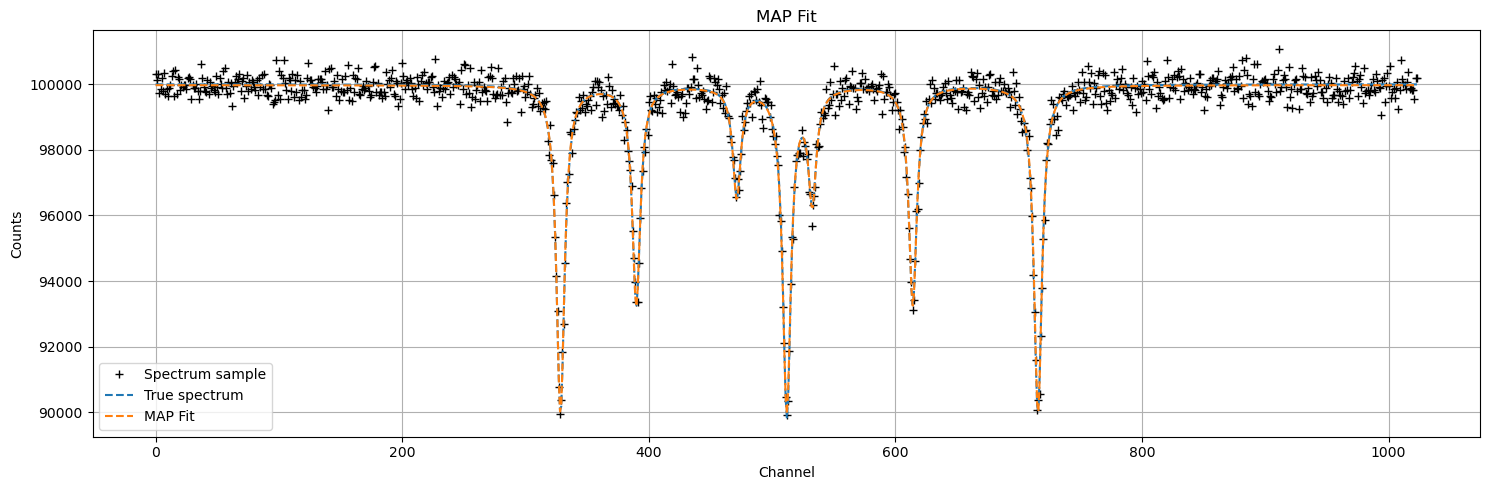

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(CHANNELS, sprectrum_sample, 'k+', label='Spectrum sample')
ax.plot(CHANNELS, spectrum_true_values, '--', label='True spectrum')
ax.plot(CHANNELS, map_model.predict(CHANNELS), '--', label='MAP Fit')
ax.legend()
ax.grid()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('MAP Fit')
plt.tight_layout()

### Bayesian Fit

In [8]:
# Analyze physics
ms.BayesianModel.analyze_physics(analysis_specs)

[]

In [9]:
# Define analysis model
bayes_model = ms.BayesianModel(analysis_specs, GEOMETRY)

In [10]:
# Fit Bayes model to sample spectrum
bayes_model = bayes_model.fit(CHANNELS, sprectrum_sample)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [bckg_coeff, sg0_amplitude_coeff, sg0_isomer_shift, sg0_line_width, sx0_amplitude_coeff, sx0_isomer_shift, sx0_quadrupole_split, sx0_ratio13, sx0_ratio23, sx0_magnetic_field, sx0_line_width123456]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 15 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
# Display results
bayes_model.results

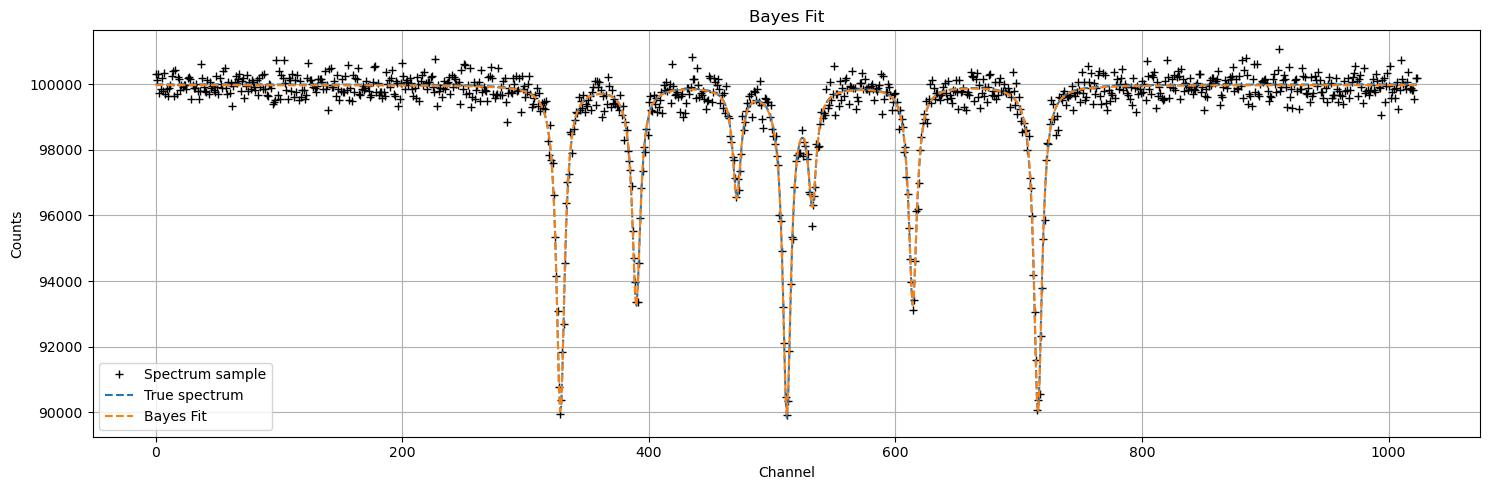

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(CHANNELS, sprectrum_sample, 'k+', label='Spectrum sample')
ax.plot(CHANNELS, spectrum_true_values, '--', label='True spectrum')
ax.plot(CHANNELS, bayes_model.predict(CHANNELS), '--', label='Bayes Fit')
ax.legend()
ax.grid()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Bayes Fit')
plt.tight_layout()

### Beyond pyMSB

In [24]:
bayes_model.results.spectrum.singlets[0].amplitude.posterior.mean()

9855.78616785209

(array([  2.,   0.,   1.,   4.,   4.,   6.,   9.,  17.,  32.,  55.,  61.,
         81.,  96., 110., 107.,  99.,  86.,  83.,  49.,  48.,  29.,  15.,
          3.,   1.,   0.,   2.]),
 array([ 9187.48081796,  9234.69261064,  9281.90440332,  9329.116196  ,
         9376.32798868,  9423.53978136,  9470.75157404,  9517.96336672,
         9565.1751594 ,  9612.38695208,  9659.59874476,  9706.81053744,
         9754.02233012,  9801.2341228 ,  9848.44591548,  9895.65770816,
         9942.86950084,  9990.08129352, 10037.2930862 , 10084.50487888,
        10131.71667156, 10178.92846424, 10226.14025692, 10273.3520496 ,
        10320.56384228, 10367.77563496, 10414.98742764]),
 <BarContainer object of 26 artists>)

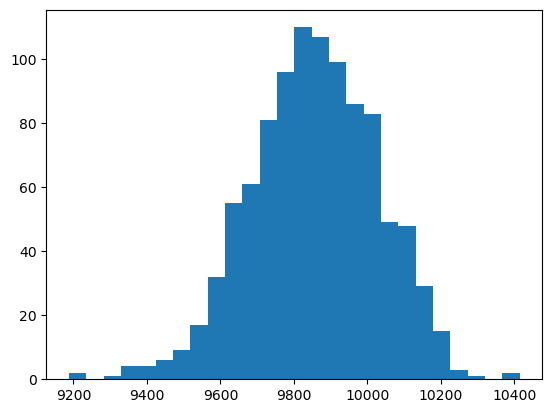

In [25]:
plt.hist(bayes_model.results.spectrum.singlets[0].amplitude.posterior, bins='auto')

In [26]:
bayes_model.idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [27]:
import arviz as az

array([[<Axes: title={'center': 'bckg_coeff'}>,
        <Axes: title={'center': 'bckg_coeff'}>],
       [<Axes: title={'center': 'sg0_amplitude_coeff'}>,
        <Axes: title={'center': 'sg0_amplitude_coeff'}>],
       [<Axes: title={'center': 'sg0_isomer_shift'}>,
        <Axes: title={'center': 'sg0_isomer_shift'}>],
       [<Axes: title={'center': 'sx0_amplitude_coeff'}>,
        <Axes: title={'center': 'sx0_amplitude_coeff'}>],
       [<Axes: title={'center': 'sx0_isomer_shift'}>,
        <Axes: title={'center': 'sx0_isomer_shift'}>],
       [<Axes: title={'center': 'sx0_quadrupole_split'}>,
        <Axes: title={'center': 'sx0_quadrupole_split'}>],
       [<Axes: title={'center': 'sx0_ratio13'}>,
        <Axes: title={'center': 'sx0_ratio13'}>],
       [<Axes: title={'center': 'sx0_ratio23'}>,
        <Axes: title={'center': 'sx0_ratio23'}>],
       [<Axes: title={'center': 'sx0_magnetic_field'}>,
        <Axes: title={'center': 'sx0_magnetic_field'}>],
       [<Axes: title={'cent

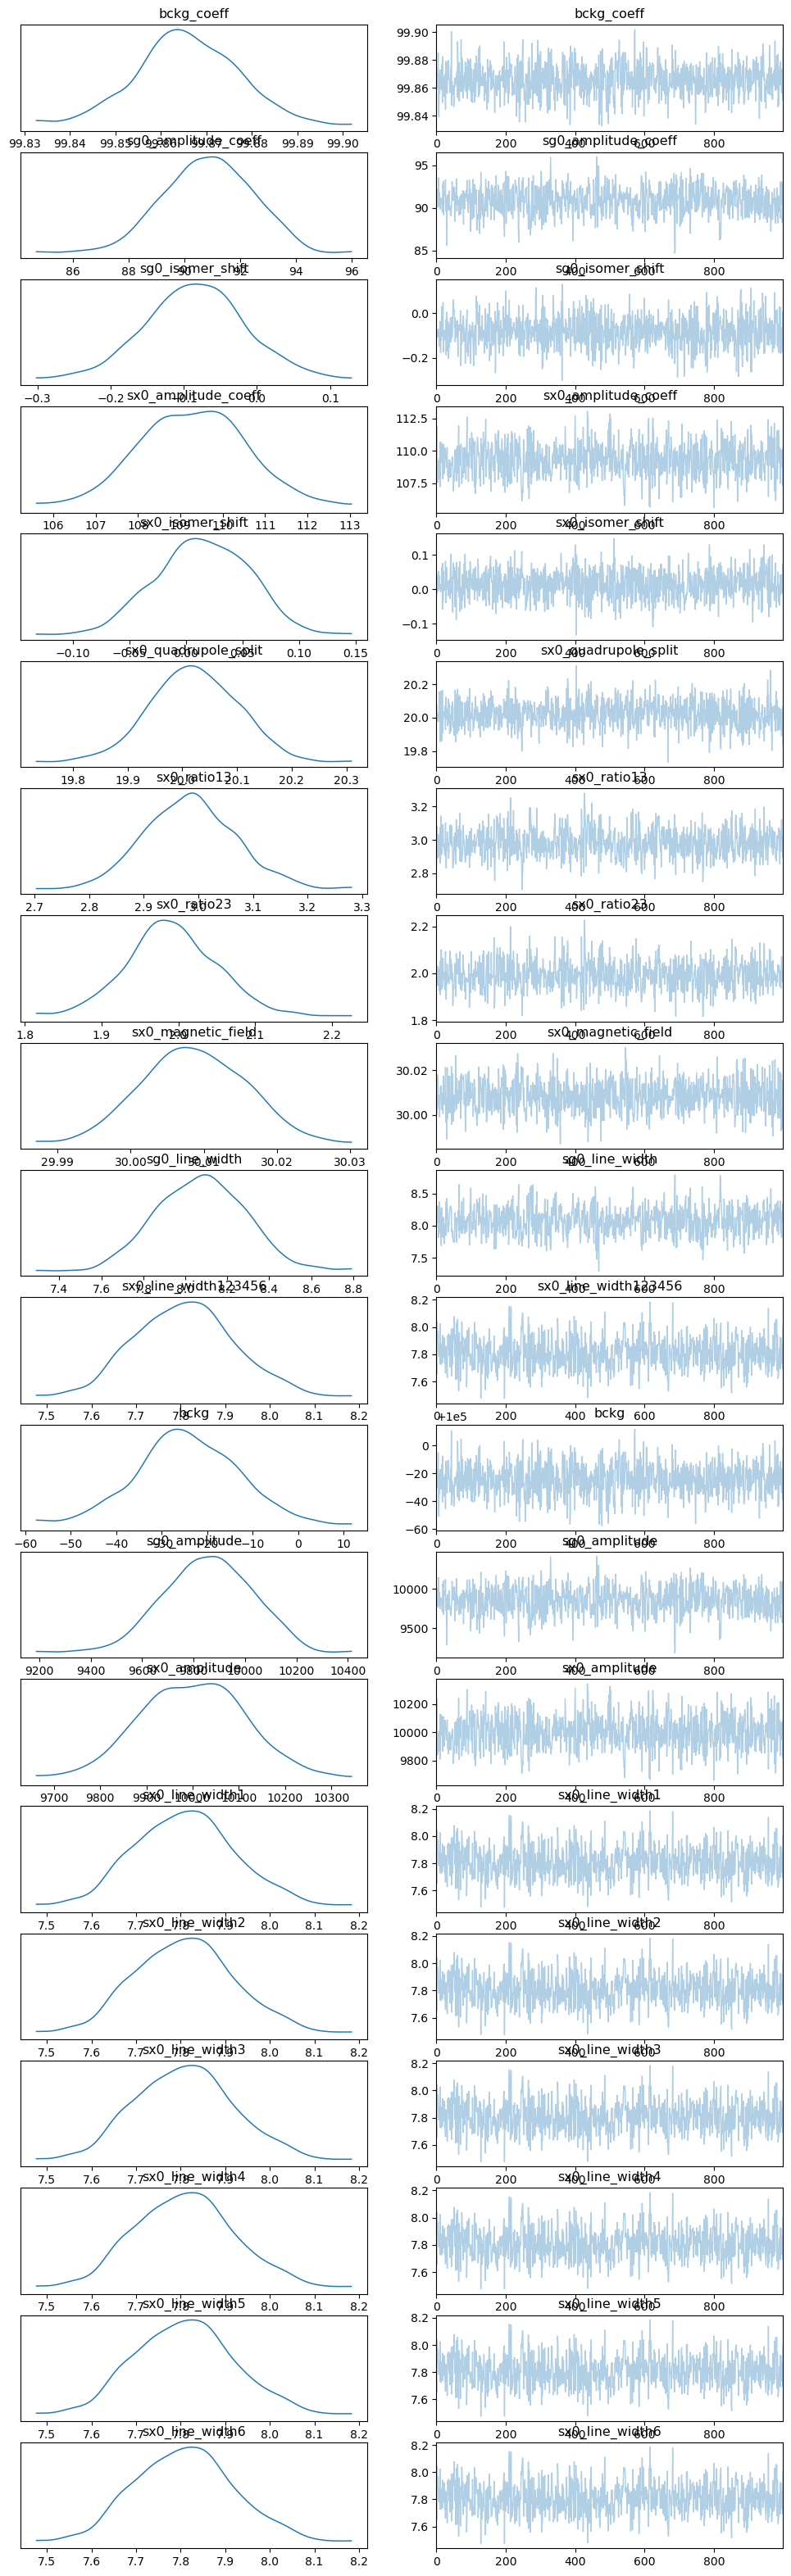

In [ ]:
az.plot_trace(bayes_model.idata)

In [34]:
bayes_model.idata.posterior.keys()

KeysView(<xarray.Dataset> Size: 164kB
Dimensions:               (chain: 1, draw: 1000)
Coordinates:
  * chain                 (chain) int32 4B 0
  * draw                  (draw) int32 4kB 0 1 2 3 4 5 ... 995 996 997 998 999
Data variables: (12/20)
    bckg_coeff            (chain, draw) float64 8kB 99.86 99.86 ... 99.85 99.89
    sg0_amplitude_coeff   (chain, draw) float64 8kB 91.62 92.21 ... 90.43 88.76
    sg0_isomer_shift      (chain, draw) float64 8kB -0.1178 -0.07756 ... -0.1473
    sx0_amplitude_coeff   (chain, draw) float64 8kB 109.9 111.9 ... 107.3 110.2
    sx0_isomer_shift      (chain, draw) float64 8kB 0.03772 -0.01334 ... 0.02039
    sx0_quadrupole_split  (chain, draw) float64 8kB 20.07 20.07 ... 20.07 19.84
    ...                    ...
    sx0_line_width1       (chain, draw) float64 8kB 7.73 7.654 ... 7.696 8.001
    sx0_line_width2       (chain, draw) float64 8kB 7.73 7.654 ... 7.696 8.001
    sx0_line_width3       (chain, draw) float64 8kB 7.73 7.654 ... 7.696 8.001
  

<Axes: title={'center': 'bckg_coeff'}>

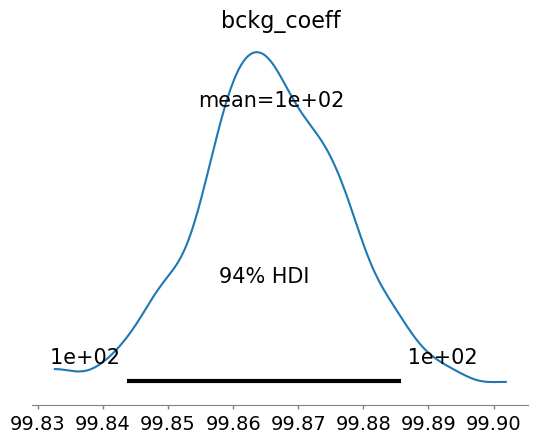

In [33]:
az.plot_posterior(bayes_model.idata.posterior['bckg_coeff'])